In [59]:
import pandas as pd
import numpy as np

from sklearn.externals.six import StringIO 
import pydotplus
from IPython.display import Image

from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.cross_validation import train_test_split

### Challenge 1

In [60]:
df = pd.read_csv("house-votes-84.csv", header = None)
df.columns = ['party','hndc_inf','water_project','budget_res','phys_fee','salvador','relig_grp','sattelite','nicaragua',
             'missile','immigration','synfuels','education','superfund', 'crime','duty_free','south_africa']

Replace y/n answers with bolleans, NA's - with mean responses for each column, democrats with - 1, republicans - 0.

In [61]:
df = df.replace(to_replace = ['y','n','?'], value = [1,0,None])
df = df.replace(to_replace = ['democrat','republican'], value = [1,0])
df = df.fillna(df.mean(axis = 0));

In [62]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,1:],df.iloc[:,0],test_size=0.3,random_state=4444)

In [63]:
cls = tree.DecisionTreeClassifier(random_state = 123)
cls.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=123, splitter='best')

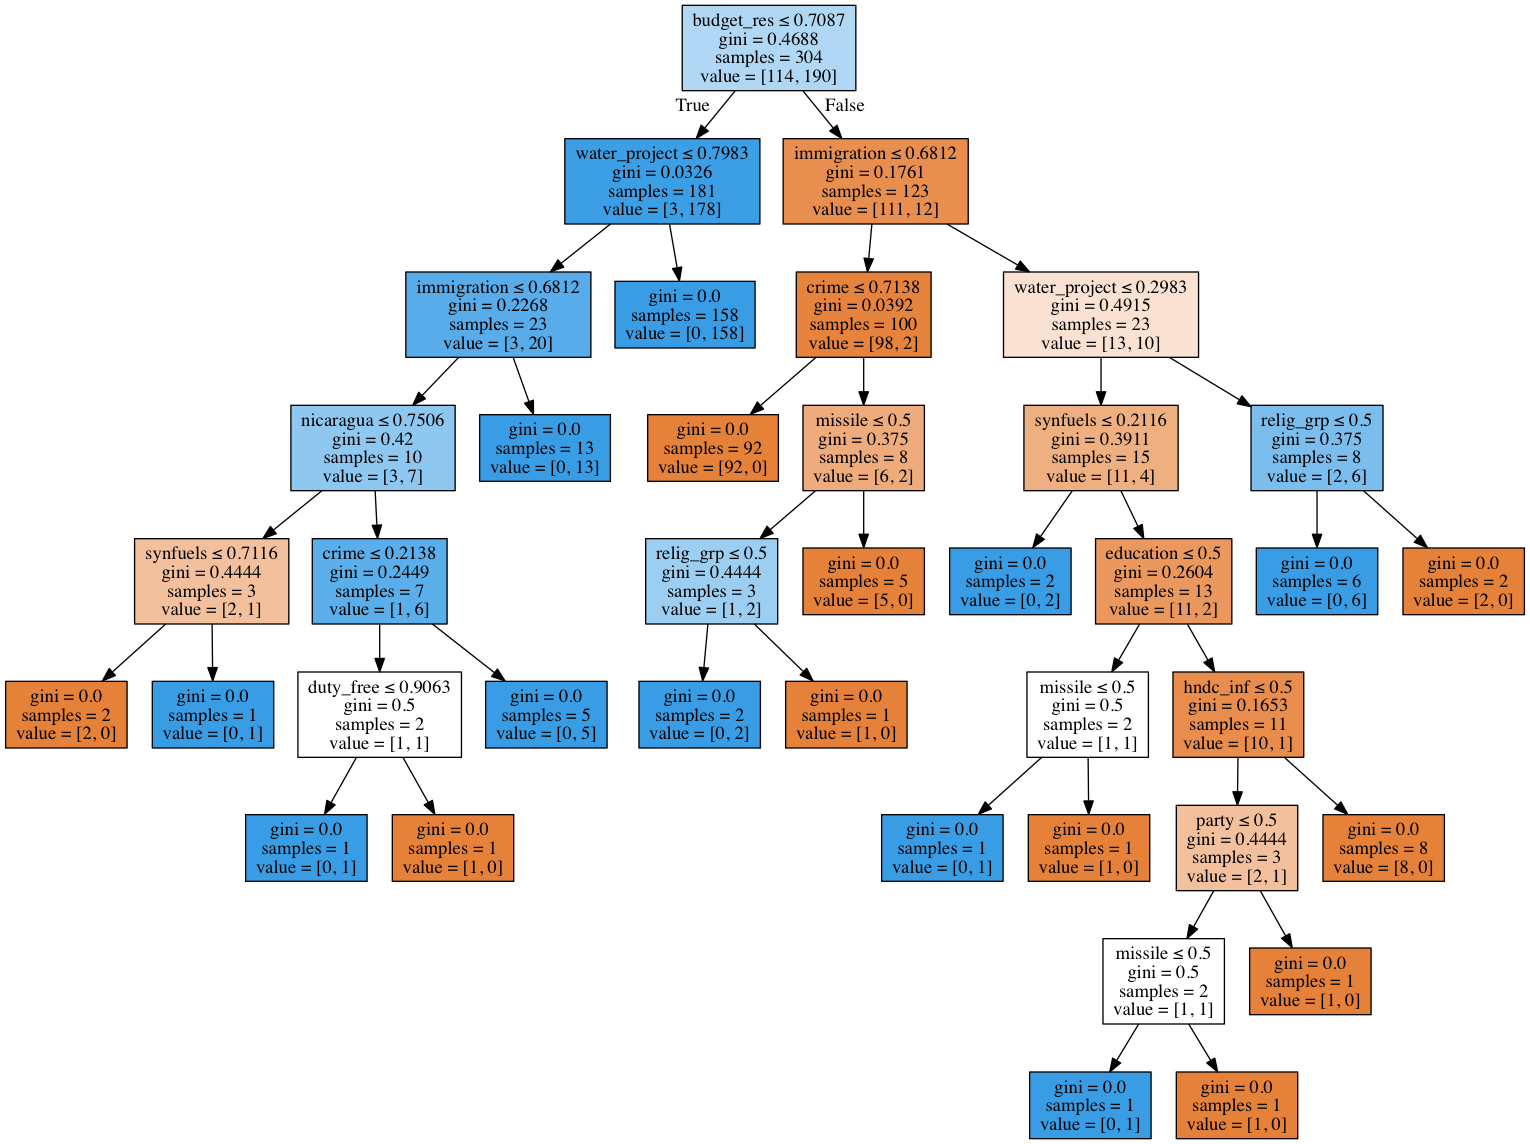

In [64]:
dot_data = StringIO() 
tree.export_graphviz(cls, out_file=dot_data, filled = True, special_characters = True, feature_names = df.columns) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("house_votes.pdf")
Image(graph.create_png())

### Challenge 2

In [65]:
df = pd.read_csv("2013_movies.csv")

X = df[['Budget','DomesticTotalGross','Runtime']].copy()
X.Budget = X.Budget.fillna(X.Budget.mean())
X.DomesticTotalGross = X.DomesticTotalGross.fillna(X.DomesticTotalGross.mean())
X.Runtime = X.Runtime.fillna(X.Runtime.mean())
y = df.Rating

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [67]:
cls = tree.DecisionTreeClassifier(random_state = 123)
cls.fit(x_train,y_train);

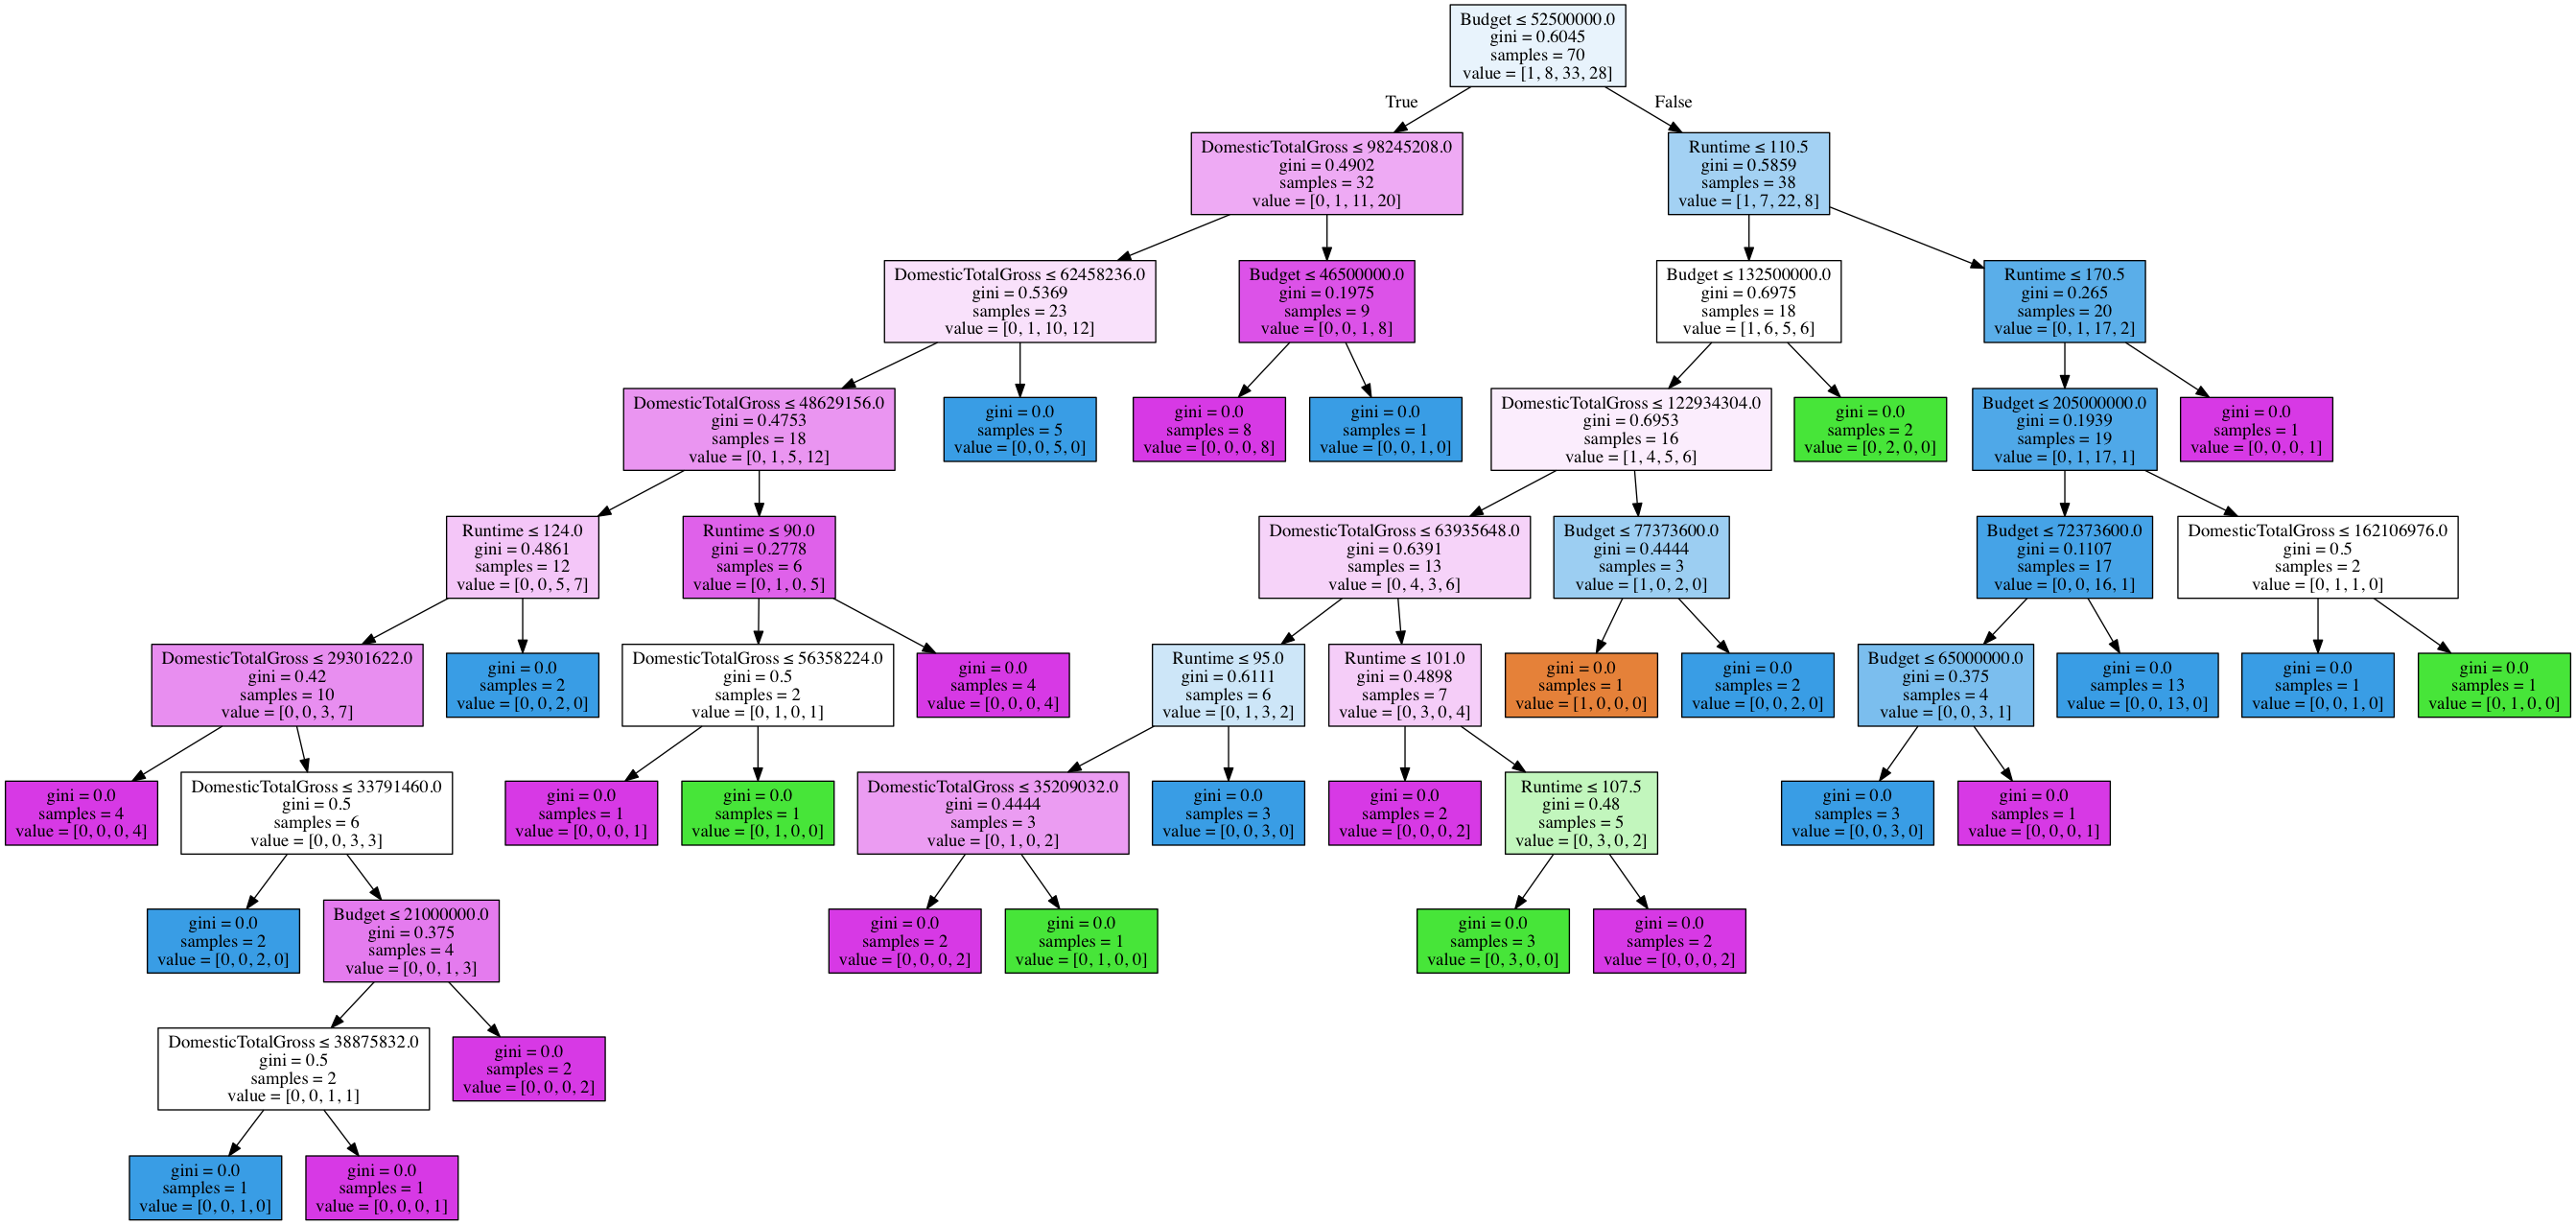

In [68]:
dot_data = StringIO() 
tree.export_graphviz(cls, out_file=dot_data, filled = True, special_characters = True, feature_names = ['Budget', 'DomesticTotalGross', 'Runtime']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("2013_movie_graph.pdf")
Image(graph.create_png())

### Challenge 3

In [69]:
train = pd.read_csv('titanic_train.csv')

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [71]:
train.Age = train.Age.fillna(train.Age.mean())
train = train.dropna(subset = ['Embarked'])

In [72]:
X = pd.get_dummies(train[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']])
y = train.Survived

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4444)

In [74]:
x_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [75]:
cls = tree.DecisionTreeClassifier(random_state = 123)
cls.fit(x_train,y_train);

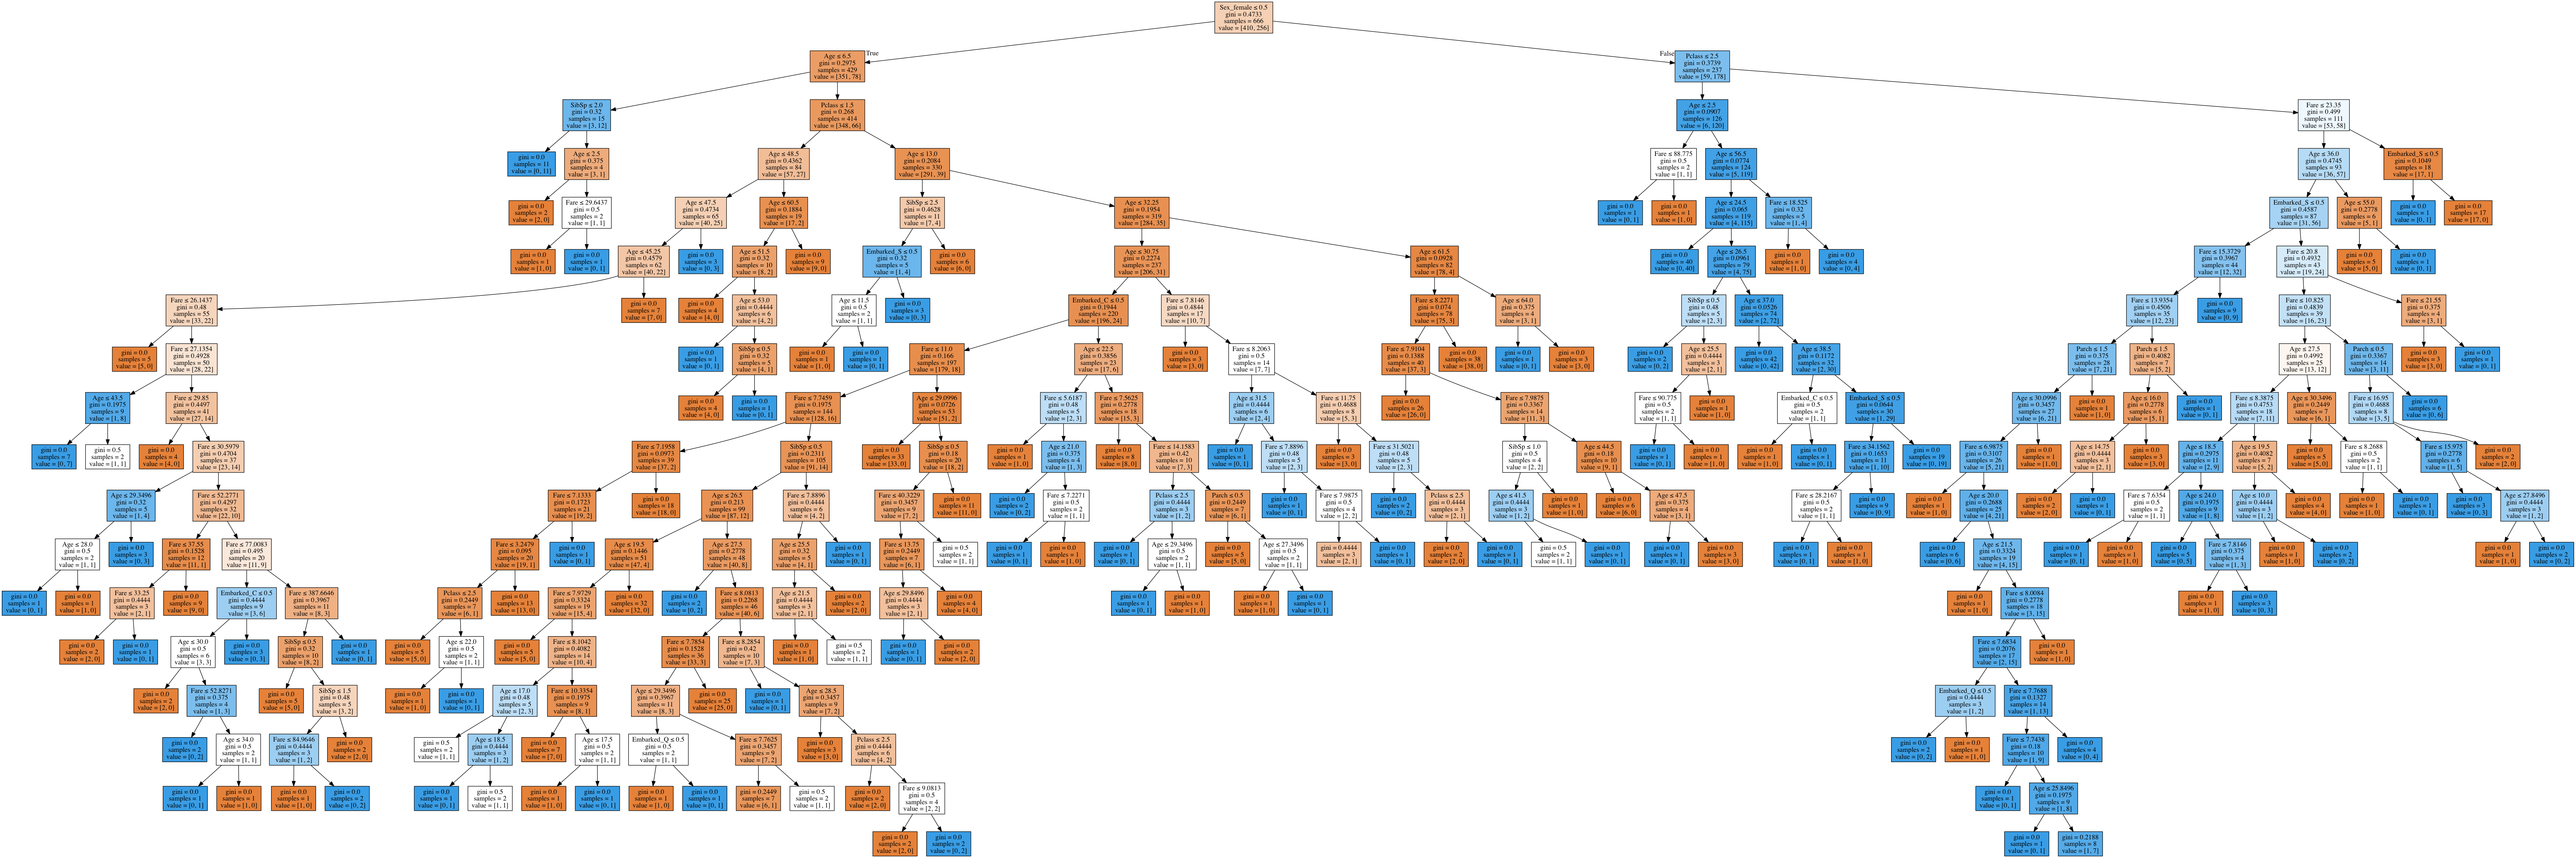

In [76]:
dot_data = StringIO() 
tree.export_graphviz(cls, out_file=dot_data, filled = True, special_characters = True, feature_names = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S']) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("Titanic_graph.pdf")
Image(graph.create_png())